In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import pandas as pd
from textblob import TextBlob
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

nltk.download('wordnet')

def add_sentiment(data):
    data['Sentiment'] = data['Feedback'].apply(get_sentiment)
    return data

def get_sentiment(feedback):
    analysis = TextBlob(feedback)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'
    

# Get the data
data = pd.read_excel('Data/Data Recieved from NYT/London Met Data.xlsx')

#add sentiment analysis and sentiment column to the data

data = add_sentiment(data)

#display the data
data.head(5)

# Get the positive feedbacks
positive_feedbacks = data[data['Sentiment'] == 'Positive']['Feedback']

# Join all the feedbacks into a single string
text = ' '.join(positive_feedbacks)

# Convert to lower case
text = text.lower()

# Remove punctuation
text = re.sub(r'[^\w\s]', '', text)

# Lemmatization
lemmatizer = WordNetLemmatizer()
words = word_tokenize(text)
words = [lemmatizer.lemmatize(word, pos='v') for word in words]

# Remove the stopwords
stop_words = set(stopwords.words('english'))
words = [word for word in words if word not in stop_words]

# Count the words
word_counts = Counter(words)

# Get the most common words
most_common_words = word_counts.most_common(10)

#Print the most common words without the count
most_common_words = [word for word, count in most_common_words]


print('Most common words in positive feedbacks:', most_common_words)

[nltk_data] Downloading package wordnet to /Users/uttam/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Most common words in positive feedbacks: ['student', 'session', 'group', 'really', 'great', 'work', 'engage', 'get', 'seem', 'see']


In [28]:
# Add more words to the list
additional_stopwords = ['.', ',', 'Student','I','session','group','He','-','She','!','today',"'", "also","'",
                        "would", "see", "’", "seemed","'s", ")","get", "could"]  # replace with your words
stop_words.update(additional_stopwords)

In [23]:
words = [word for word in words if word not in stop_words]

# Count the words
word_counts = Counter(words)

# Get the most common words
most_common_words = word_counts.most_common(10)

print('Most common words in positive feedbacks:', most_common_words)

Most common words in positive feedbacks: [('student', 526), ('really', 170), ('great', 164), ('work', 132), ('engage', 117), ('seem', 109), ('well', 92), ('enjoy', 89), ('exercise', 84), ('activities', 78)]


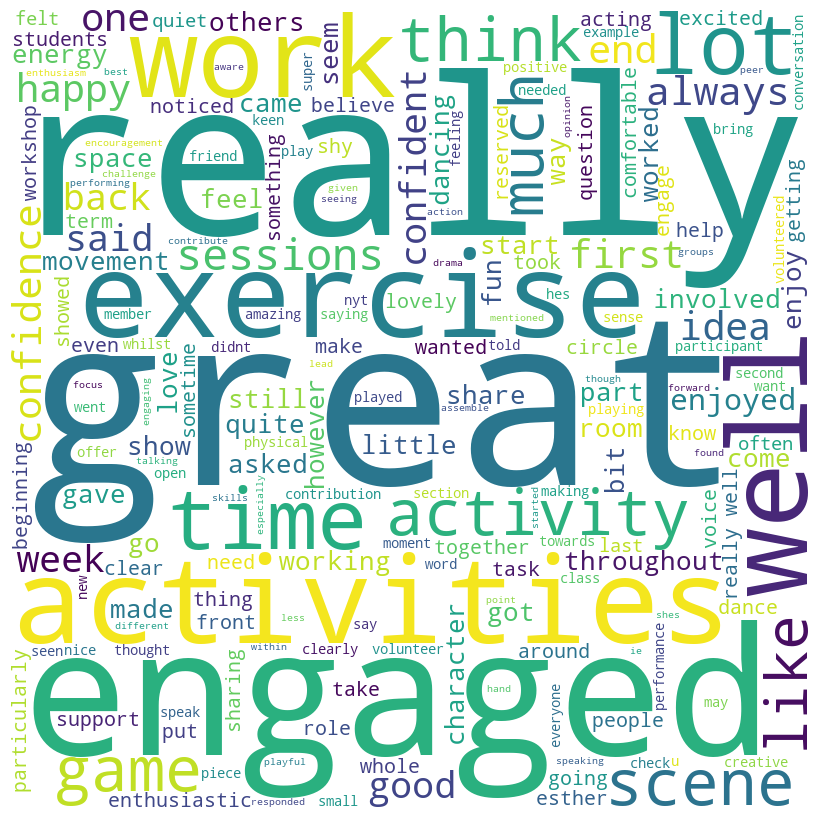

In [30]:
#make word cloud of most common 50 words in positive feedbacks

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10).generate(text)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()



In [26]:
# Function to get the most common words for positive feedbacks
def get_most_common_words(data,num_words=10):
    positive_feedbacks = data[data['Sentiment'] == 'Positive']['Feedback']
    text = ' '.join(positive_feedbacks)
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    lemmatizer = WordNetLemmatizer()
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word, pos='v') for word in words]
    stop_words = set(stopwords.words('english'))
    additional_stopwords = ['.', ',', 'Student','I','session','group','He','-','She','!','today',"'", "also","'",
                            "would", "see", "’", "seemed","'s", ")","get","could"]  # replace with your words
    stop_words.update(additional_stopwords)
    words = [word for word in words if word not in stop_words]
    word_counts = Counter(words)
    most_common_words = word_counts.most_common(num_words)
    return most_common_words


In [27]:
get_most_common_words(data)

[('student', 526),
 ('really', 170),
 ('great', 164),
 ('work', 132),
 ('engage', 117),
 ('seem', 109),
 ('well', 92),
 ('enjoy', 89),
 ('exercise', 84),
 ('activities', 78)]

In [31]:
#function to make wordcloud of most common words in positive feedbacks

def make_wordcloud(data):
    positive_feedbacks = data[data['Sentiment'] == 'Positive']['Feedback']
    text = ' '.join(positive_feedbacks)
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    lemmatizer = WordNetLemmatizer()
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word, pos='v') for word in words]
    stop_words = set(stopwords.words('english'))
    additional_stopwords = ['.', ',', 'Student','I','session','group','He','-','She','!','today',"'", "also","'",
                            "would", "see", "’", "seemed","'s", ")","get","could"]  # replace with your words
    stop_words.update(additional_stopwords)
    words = [word for word in words if word not in stop_words]
    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10).generate(text)
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()


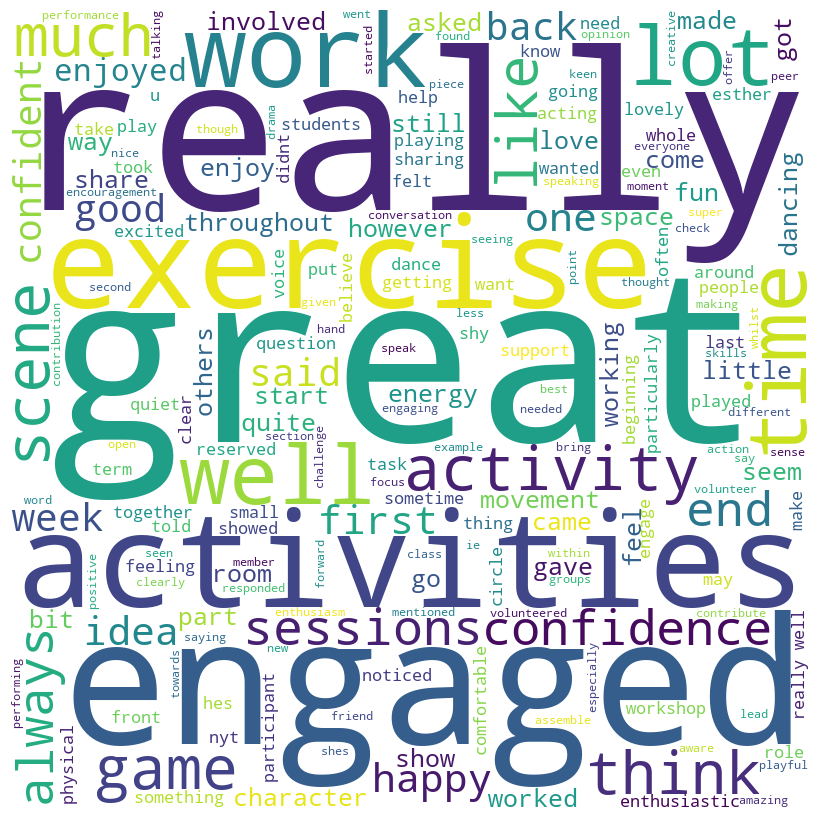

In [32]:
make_wordcloud(data)

/Users/uttam/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


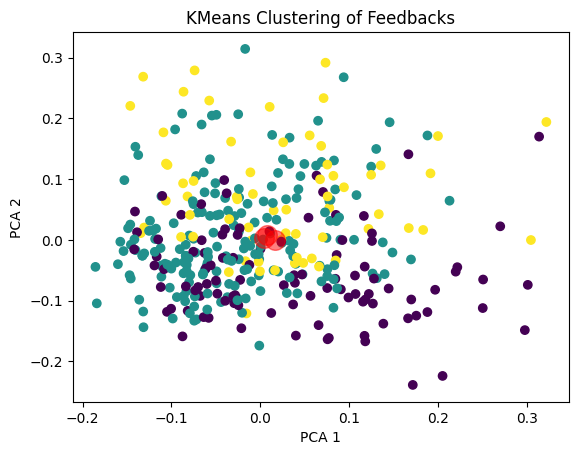

In [34]:
#cluster the students using feedbacks using KMeans clustering

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Get the data
data = pd.read_excel('Data/Data Recieved from NYT/London Met Data.xlsx')

# Add sentiment analysis and sentiment column to the data
data = add_sentiment(data)

# Get the positive feedbacks
positive_feedbacks = data[data['Sentiment'] == 'Positive']['Feedback']

# Create the vectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['Feedback'])

# Create the KMeans model
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# Get the cluster centers
centers = kmeans.cluster_centers_

# Reduce the dimensionality to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Plot the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('KMeans Clustering of Feedbacks')
plt.show()


In [ ]:
#convert above code into a function

def cluster_students(data, num_clusters=3):
    data = add_sentiment(data)
    positive_feedbacks = data[data['Sentiment'] == 'Positive']['Feedback']
    vectorizer = TfidfVectorizer(stop_words='english')
    X = vectorizer.fit_transform(data['Feedback'])
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)
    centers = kmeans.cluster_centers_
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X.toarray())
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.title('KMeans Clustering of Feedbacks')
    plt.show()


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans

# Get the data
data = pd.read_excel('Data/Data Recieved from NYT/London Met Data.xlsx')

#group by studend id
data = data.groupby('Student ID').agg({'Feedback': ' '.join}).reset_index()

# Convert the feedback into vectors
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['Feedback'])

# Calculate the cosine similarity matrix
cosine_sim = cosine_similarity(X)

# Use K-means clustering on the cosine similarity matrix
kmeans = KMeans(n_clusters=3)  # Change the number of clusters as needed
clusters = kmeans.fit_predict(cosine_sim)

# Add the cluster labels to the original data
data['Cluster'] = clusters

grouped_data = data.groupby('Cluster')

#display the data in each cluster
for name, group in grouped_data:
    print('Cluster:', name)
    print(group[['Student ID', 'Feedback']])
    print('\n')


/Users/uttam/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster: 0
    Student ID                                           Feedback
22          23  Phoenix is very shy but has been building conf...
23          24  Student 24 has a lovely energy and is engaging...
37          39  She spend most of her time with the teaching a...
43          45  Started off the session quite quiet and resist...
47          49  Chose to get up\nSmiling a lot more\nMaking so...
48          50  I worked with him in the mirroring and he smil...
56          58  Confident communicator and engaged the rest of...


Cluster: 1
    Student ID                                           Feedback
0            1  Student 1 was quite hesitant at the start of t...
5            6  Student 6 was engaged during the feedback and ...
7            8  Mimics and uses catch phrases. Completely enga...
10          11  Student 11 was consistent today. Really took p...
11          12  Student 12 was really engaged today! Took part...
12          13  Active & was keen to get stuck in fo

In [10]:
#save the data with cluster to a separate excel file
data.to_excel('Data/Data Recieved from NYT/London Met Data with Cluster.xlsx', index=False)

In [9]:
#read 2 random feedback for each cluster wrap  feedback text for display

for name, group in grouped_data:
    print('Cluster:', name)
    print('Feedbacks:')
    for i in range(2):
        feedback = group['Feedback'].iloc[i]
        print(f'{i+1}. {feedback}')
        print('\n')
    print('\n')
    

Cluster: 0
Feedbacks:
1. Phoenix is very shy but has been building confidence over the weeks. They're very close with Student 24 and entered the room as 'twins', speaking and moving in unison which shows their engagement with play is growing. Is happy to speak in front of the group now, if very quietly, which they weren't in the beginning, and are very confident talking to adults. Their self portrait showed some reflections of low self esteem but they worked with Student 24 to find lots of positives about themselves. Worth exploring what they like re poetry, music, script etc.


2. Student 24 has a lovely energy and is engaging more and more each week. They can sometimes come across as shy but is building in confidence and is often the first to answer questions, if not rushed by support staff. Has some really great moments in pass the bird and I'm looking forward to exploring more of her interests and performance options.




Cluster: 1
Feedbacks:
1. Student 1 was quite hesitant at the

In [13]:
#import excel file with cluster data and plot pie chart using plotly of students in each cluster
import pandas as pd
import plotly.express as px
data = pd.read_excel('Data/Data Recieved from NYT/London Met Data with Cluster.xlsx')

# Plot the pie chart
fig = px.pie(data, names='Cluster', title='Students in Each Cluster')
fig.show()

#convert above code into a function

def plot_cluster_pie_chart(data):
    fig = px.pie(data, names='Cluster', title='Students in Each Cluster')
    fig.show()



In [39]:
grouped_data.head(5)

,Student ID,Feedback,Sentiment,Cluster
0,1,Student 1 was quite hesitant at the start of t...,Positive,2
1,1,Student 1 was lovely as always !\n- was very e...,Positive,2
2,1,Student 1 was enthusiastic and excited through...,Positive,2
3,1,Student 1 enjoyed the session. In the first ha...,Positive,2
4,1,"Engaged, took part, bit shy but lots of potent...",Positive,0
5,1,Student 1 was lovely in session today!\n- was ...,Positive,2
11,2,"Student 2 was very confident today, asking lot...",Positive,0
12,2,Despite his moments of distraction and being c...,Positive,1
13,2,His character made me smile really wide. Very ...,Positive,0
14,2,Student 2 loves to actively participate and in...,Positive,1


In [ ]:
#make above code into a function and print the output in streamlit website

def cluster_students(data, num_clusters=3):
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(data['Feedback'])
    cosine_sim = cosine_similarity(X)
    kmeans = KMeans(n_clusters=num_clusters)
    clusters = kmeans.fit_predict(cosine_sim)
    data['Cluster'] = clusters
    grouped_data = data.groupby('Cluster')
    for name, group in grouped_data:
        st.text('Cluster:', name)
        st.text(group[['Student ID', 'Feedback']])
        st.text('\n')
    return grouped_data








In [3]:
data = data.groupby('Student ID').agg({'Feedback': ' '.join}).reset_index()

In [6]:
data['Feedback'].iloc[0]

"Student 1 was quite hesitant at the start of the session in the check in but when we got to the junk modelling she built and designed a laptop as her community project. She enjoyed music and games which was her community and was confident sharing at the end. Student 1 was lovely as always !\n- was very engaged in jacobas warm ups, games and activities\n- was exited to ask them a question in the q&a about the play they was in\n- was great at jacobas “leading by body part” activity, she was great at creating her characters personality!\n- worked really well with Student 2 and Student 11 in the little scene they made with their characters being lead by different parts of their body\n- her and her group volunteered to show back first to the others! Student 1 was enthusiastic and excited throughout the session, it was great to see her enjoy the exercises. A specific highlight was for the end of the session, where we looked at scripts, she made suggestions about her characters and held conv